IMPORTING LIBRARIES

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


IMPORTING DATA

In [21]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


INFORMATION ABOUT DATASET

In [22]:
crop.shape

(2200, 8)

In [23]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [24]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [25]:
crop.duplicated().sum()

np.int64(0)

In [26]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [27]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [42]:
crop.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.317076
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.109993
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.089209
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.031383
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.640925
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.057527
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.311053
label,-0.317076,0.109993,-0.089209,-0.031383,-0.640925,0.057527,-0.311053,1.000000


<Axes: >

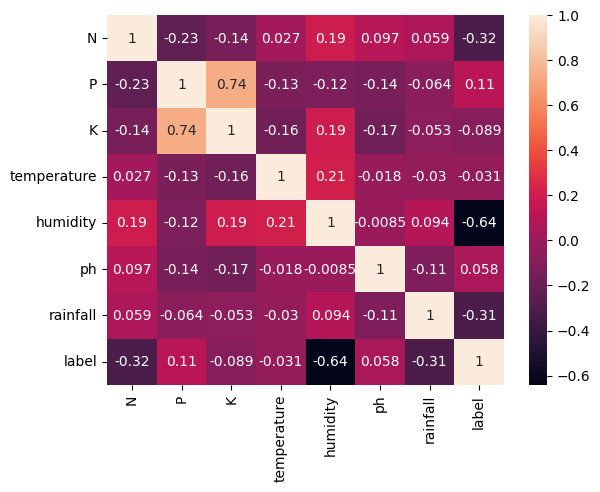

In [43]:
import seaborn as sns
sns.heatmap(crop.corr(), annot=True, cbar=True)

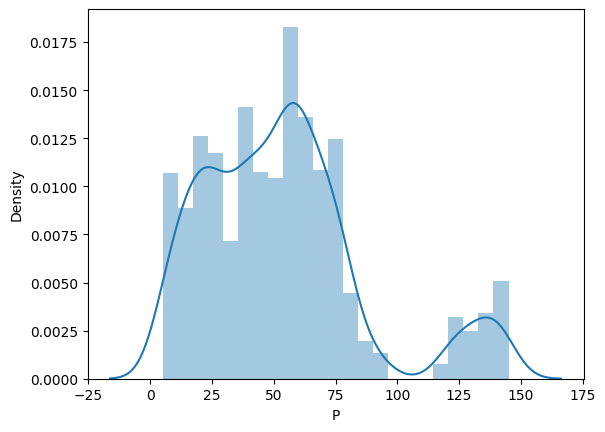

In [44]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

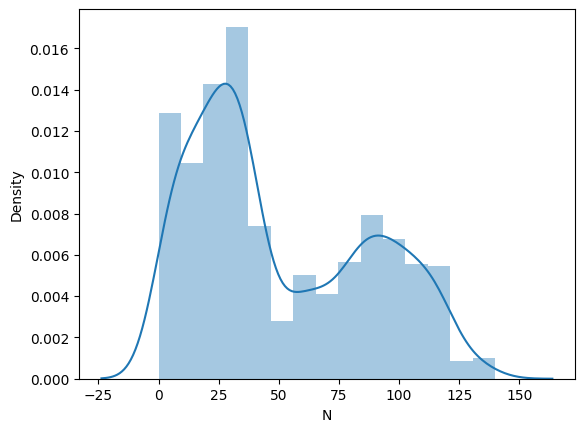

In [45]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

ENCODDING CROP LABELS

In [28]:
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
    'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
    'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15,
    'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 
    'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}


In [29]:
crop['label'] = crop['label'].map(crop_dict)

In [30]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


TRAIN TEST SPLIT

In [31]:
X = crop.drop('label', axis=1)
y = crop['label']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[-0.53417847, -0.06789696, -0.45715906, ...,  0.63108663,
         0.95211575, -0.91527645],
       [-1.02211959,  2.20913526,  3.07707053, ...,  0.95484645,
        -0.1053335 ,  0.08073056],
       [ 1.63444873, -1.43411629,  0.09568132, ...,  0.76645065,
        -0.19588187, -1.04085288],
       ...,
       [ 1.28204681, -1.40375586, -0.06227307, ...,  0.94204329,
        -0.39836382, -1.38768442],
       [ 0.87542921, -1.16087242,  0.01670413, ...,  0.89199793,
        -0.03407228, -1.45364806],
       [-1.13055095,  2.72526256,  2.93886044, ...,  0.95866808,
        -1.16221818,  0.25182973]], shape=(1760, 7))

CHECKING ACCURACY OF DIFFERENT MODELS

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    print("==========================================================")

Logistic Regression  with accuracy : 0.975
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9772727272727273
K-Nearest Neighbors  with accuracy : 0.9772727272727273
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9977272727272727
Bagging  with accuracy : 0.9840909090909091
AdaBoost  with accuracy : 0.3090909090909091
Gradient Boosting  with accuracy : 0.990909090909091
Extra Trees  with accuracy : 0.8977272727272727


Model Selection: Using a RandomForestClassifier with controlled depth

In [37]:
randclf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)

# Model Accuracy
print(f"RandomForest Accuracy: {accuracy_score(y_test, y_pred)}")

RandomForest Accuracy: 0.9954545454545455


Recommendation Function

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [40]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], 
                            columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"])
    
    # Scale the data using the pre-fitted scaler
    features_scaled = scaler.transform(features)

    # Predict the crop
    prediction = model.predict(features_scaled)
    return prediction[0]

In [ ]:
print(recommendation(90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536))
print(recommendation(80, 40, 30, 32, 70, 5.8, 150))

1
22


In [ ]:
import pickle
with open("crop_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)